En este proyecto la primera etapa es limpieza de los datos

In [497]:
# importo primero todas las librerias que voy a utilizar y luego leo mis datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


df = pd.read_csv('games.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


In [498]:
# Pongo los nombres de las columnas en minusculas 

df.columns = df.columns.str.lower()

In [499]:
# obtengo informacion  del DF  asi como la cantidad de entradas y datos faltantes y tipo de dato de las columnas 

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [500]:
#  Obtengo el encabezado del DF con informacion de cada columnas

print(df.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [501]:
# Obtengo informacion numerica de mi DF

df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [502]:
# busco valores Duplicados en el df

datos_duplicados = df.duplicated().sum()

# No encontre valores duplicados

In [562]:
# procedo a buscar valores Nulos o ausentes
datos_nulos = df.isna().sum()
print(f'Los datos Nulos son:\n{datos_nulos}')


Los datos Nulos son:
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating                0
ventas_totales        0
dtype: int64


In [504]:
# Relleno los datos ausentes de Name con Deconocido
df['name'].fillna('desconocido', inplace=True)


In [505]:
# Relleno los datos ausentes de genre por desconocido

df['genre'].fillna('desconocido', inplace=True)


In [506]:
# Relleno los datos ausentes de years of realese por 0 y convierto el campo a entero ya que esta como flotante pero en esa columna guardas mos años entero

df['year_of_release'] = df['year_of_release'].fillna(0).astype('int')

In [507]:
df['user_score'].unique()


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [508]:
df['user_score'].replace('tbd', np.nan, inplace=True)

In [509]:
# Hago mi columan user score como float ya que los valores que tiene son flotantes a excepcion por el tbd pero  ya que corregie ese detalle procedo

df['user_score'] = df['user_score'].astype('float')

In [510]:
df['user_score'].isna().sum()


9125

In [511]:
df['user_score'].describe()

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

In [512]:
# Ahora hago lo propio para la columna rating vamos a rellenar los valores ausentes con  rating desconocido 
print(df['rating'].unique())
df['rating'].fillna('Rating Desconocido', inplace=True)



['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


In [513]:
df["ventas_totales"] = df['eu_sales'] + df['jp_sales'] + df['na_sales'] + df['other_sales']


In [514]:
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
 11  ventas_totales   16715 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.5+ MB
None
                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Ma

Hasta este punto termine de limmpiar mis datos lo que hice fue llenar los datos ausentes, verificar por duplicados, cambiar las columnas years of release a entero por el tipo de dato entero que hay esa columna, tambien la columna user score a flotante por el tipo de datos que estaban dentro de ella. par esto analice un poco la informacion que contenia cada columna y asi se determino.

las columnas critic score y user score no las rellene por que considero que para el analisis me van a afectar, ya que son puntajes que tanto criticos como usuarios dan a cada consola y podrian darme informcion falsa si las relleno y analizo es por eso que las voy a dejar tal cual estan

con esta ultima informacion termina el primer paso y segundo paso doy entrada a el analicis de los datos

In [515]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ventas_totales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Rating Desconocido,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Rating Desconocido,31.38


In [516]:
# Los 10 Mejores juegos 

mejores_10_juegos =  df.nlargest(10,'ventas_totales')
mejores_10_juegos

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ventas_totales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Rating Desconocido,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Rating Desconocido,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,Rating Desconocido,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,Rating Desconocido,28.31


Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

Entre el  2000 y 2011 hubo un aumento de juegos, si son significativos estos datos. 

In [517]:
# Cantidad d juegos por año

juegos_por_year = df.groupby('year_of_release')['name'].count().reset_index()
juegos_por_year.columns = ['anio_de_lanzamiento', 'cantidad_de_juegos_lanzados']
juegos_por_year.query('anio_de_lanzamiento > 0', inplace=True)
juegos_por_year


,anio_de_lanzamiento,cantidad_de_juegos_lanzados
1,1980,9
2,1981,46
3,1982,36
4,1983,17
5,1984,14
6,1985,14
7,1986,21
8,1987,16
9,1988,15
10,1989,17


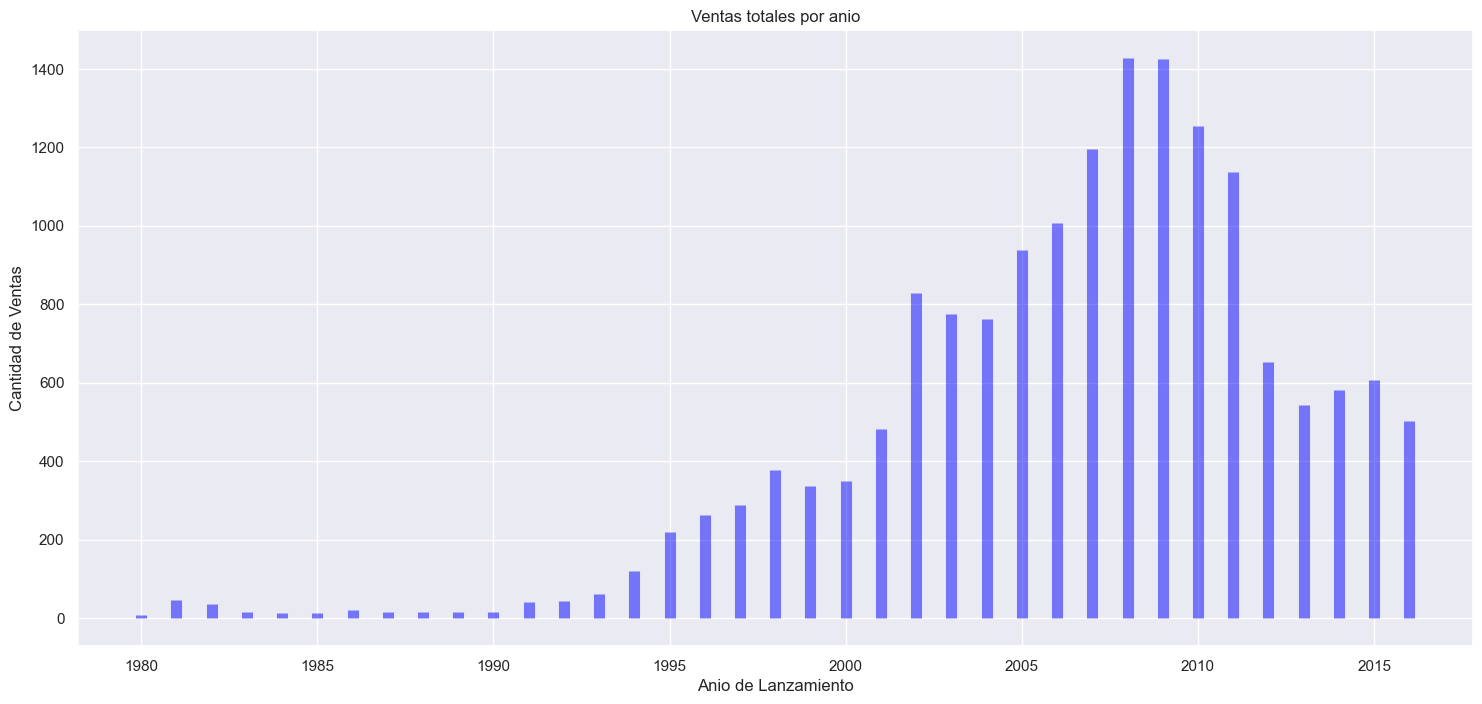

In [518]:
plt.vlines(x=juegos_por_year.anio_de_lanzamiento, ymin=0, ymax=juegos_por_year.cantidad_de_juegos_lanzados, alpha = 0.5, linewidth = 8, color ='blue')
plt.title('Ventas totales por anio')
plt.ylabel('Cantidad de Ventas')
plt.xlabel('Anio de Lanzamiento')
plt.show()

Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. 

¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

Generalmente las plataformas se vuelven obsoletas cuando una nueva plataforma entra en el mercado y tardan entre 3 y 5 años

Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

He decidido tomar los ultimos 4 años


In [519]:
# Ventas Totales por Plataforma

ventas_por_plataforma = df.groupby('platform')['ventas_totales'].sum().sort_values(ascending=False).reset_index()
ventas_por_plataforma.head(10)

,platform,ventas_totales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


In [520]:
# Calculo el Puntaje Z para determinar que tan alejados estan las plataformas del promedio

ventas_por_plataforma['z_score'] = (ventas_por_plataforma['ventas_totales'] - ventas_por_plataforma['ventas_totales'].mean()) / ventas_por_plataforma['ventas_totales'].std()

In [521]:
ventas_por_plataforma['color'] = [ 'red' if puntaje <= 0  else 'blue' for puntaje in ventas_por_plataforma['z_score']]


¿Qué plataformas son líderes en ventas? wii, ps3, ps2, y xbox 360 ¿Cuáles crecen y cuáles se reducen? Con forme va saliendo una nueva consola por ejemplo del ps2 al ps3 las ventas se reducen para la consola mas vieja.

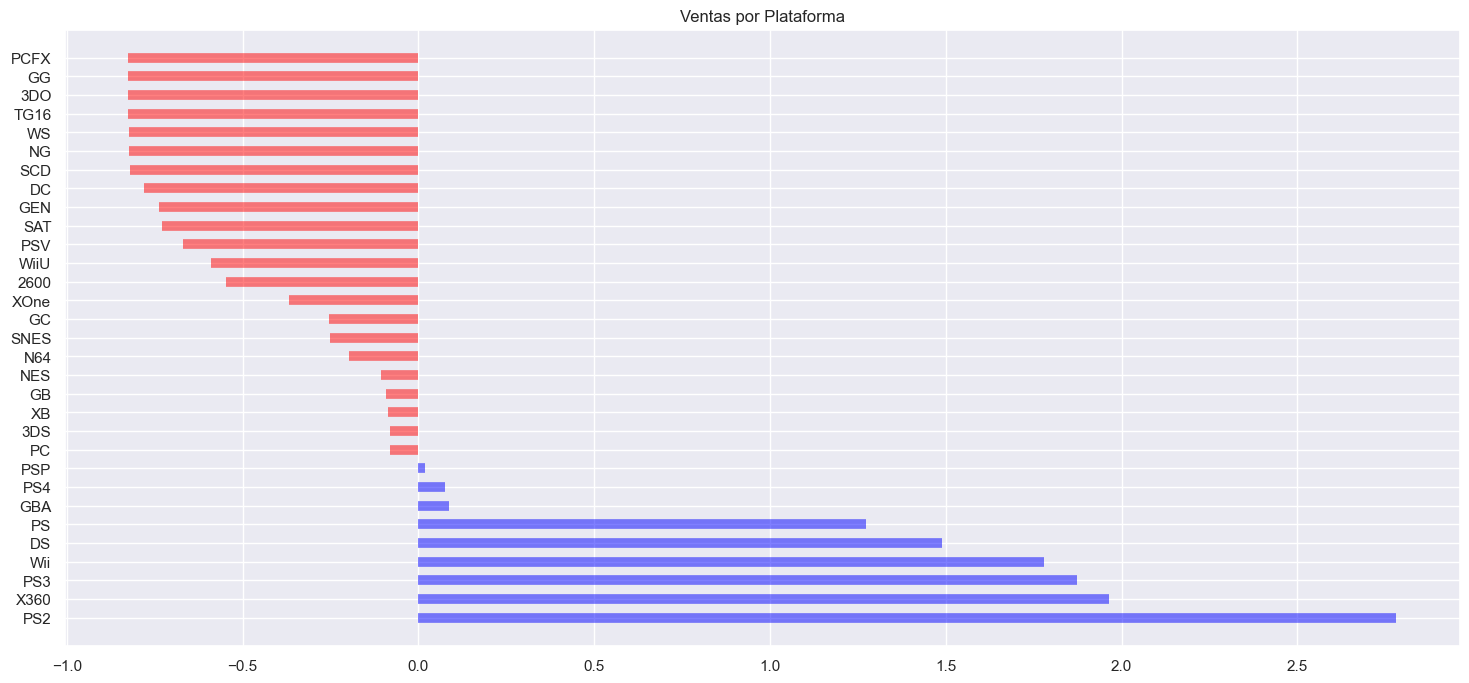

In [522]:
plt.hlines(
    y= ventas_por_plataforma.platform,
    xmin= 0,
    xmax= ventas_por_plataforma.z_score,
    colors= ventas_por_plataforma.color ,
    linewidth = 7,
    alpha = 0.5
)
plt.title('Ventas por Plataforma')
plt.show()

In [523]:
# 

tiempo_vida_plataforma = pd.pivot_table(
    df, 
    index='year_of_release',
    columns='platform',
    values='ventas_totales',
    aggfunc='sum'
).fillna(0)

In [524]:
tiempo_vida_plataforma= tiempo_vida_plataforma.iloc[1:,:]
tiempo_vida_plataforma

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980,11.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1981,35.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1982,28.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1983,5.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1984,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1985,0.45,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1986,0.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1987,1.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1988,0.74,0.00,0.00,0.00,0.00,1.43,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


c:\Users\alfre\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\alfre\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='year_of_release'>

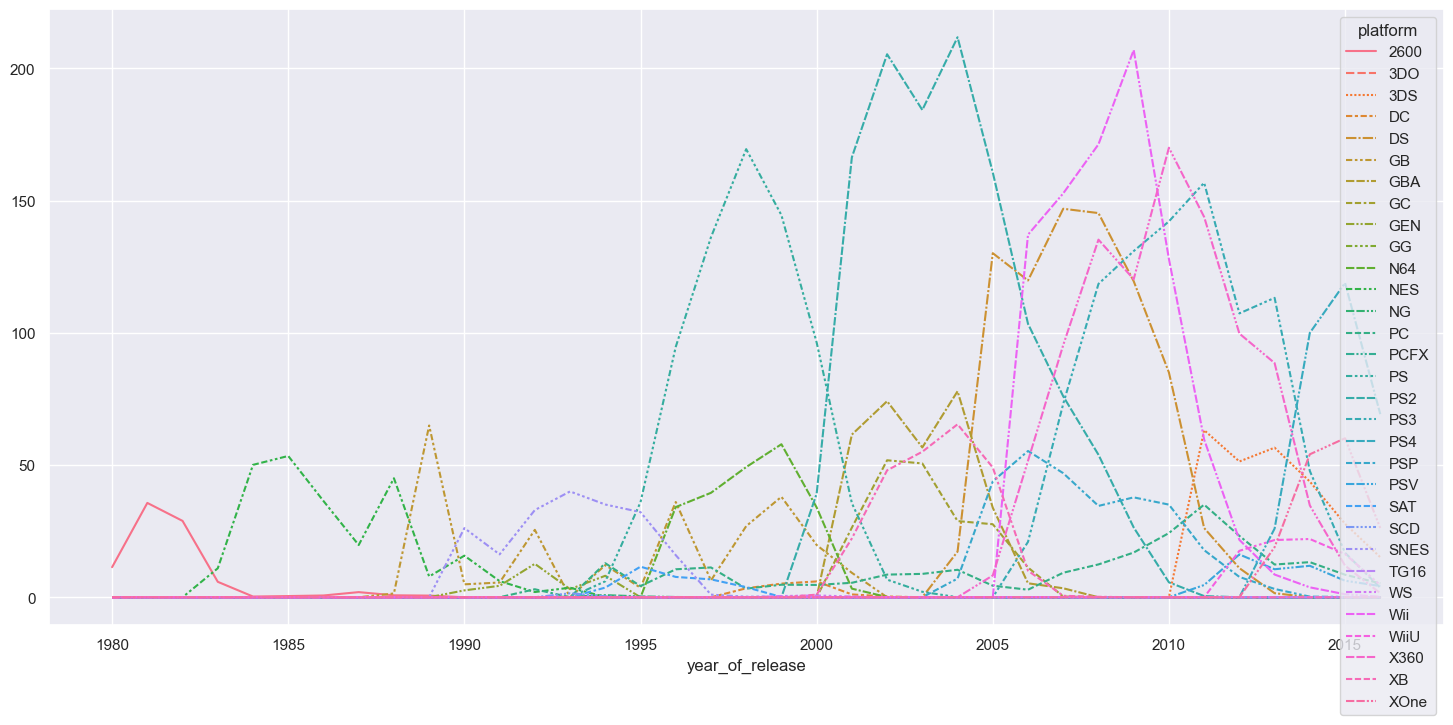

In [525]:
sns.set_theme(rc={'figure.figsize':(18,8)})
sns.lineplot(
    data = tiempo_vida_plataforma
    )


In [526]:
clean_data = df[df['year_of_release'] >= 2013]
clean_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ventas_totales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Rating Desconocido,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Rating Desconocido,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Rating Desconocido,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,Rating Desconocido,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Rating Desconocido,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Rating Desconocido,0.01


In [527]:
nuevo_tiempo_vida = clean_data.pivot_table(
    index= 'year_of_release',
    columns= 'platform',
    values='ventas_totales',
    aggfunc='sum'
).fillna(0)
nuevo_tiempo_vida

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


c:\Users\alfre\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\alfre\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


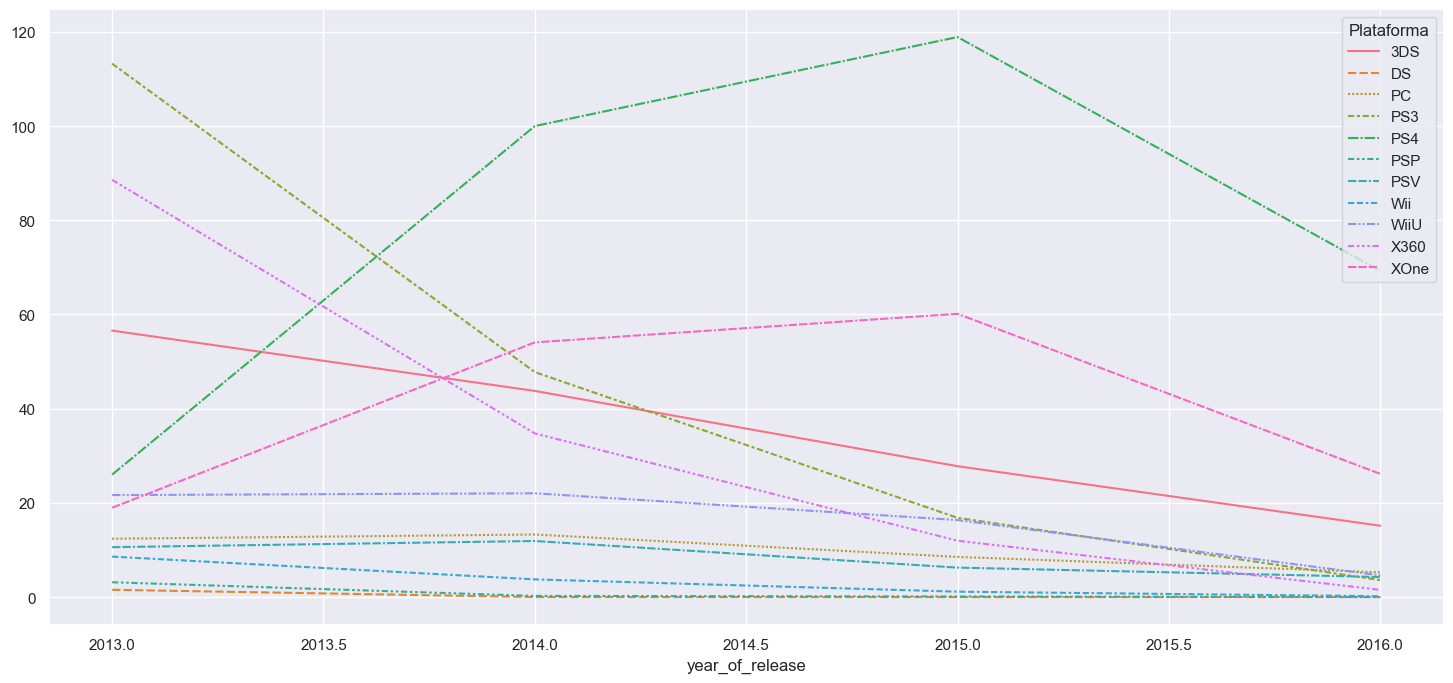

In [528]:
sns.lineplot(
    data=nuevo_tiempo_vida)
plt.legend(loc='upper right', title='Plataforma')



In [529]:
box_plot_data = clean_data.groupby(['year_of_release','platform']).agg({'ventas_totales':'sum'}).reset_index()

In [587]:
box_plot_data
#.sort_values(by='ventas_totales',ascending=False)

,year_of_release,platform,ventas_totales
0,2013,3DS,56.57
1,2013,DS,1.54
2,2013,PC,12.38
3,2013,PS3,113.25
4,2013,PS4,25.99
5,2013,PSP,3.14
6,2013,PSV,10.59
7,2013,Wii,8.59
8,2013,WiiU,21.65
9,2013,X360,88.58


Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. 

¿Son significativas las diferencias en las ventas? 
Para los año del 2013 al 2016 si son significativas las ventas 

¿Qué sucede con las ventas promedio en varias plataformas?
las ventas promedio de las nuevas plataformas se dispara en los años mas recientes.
  

Text(0.5, 1.0, 'Distribucion de ventas por plataforma')

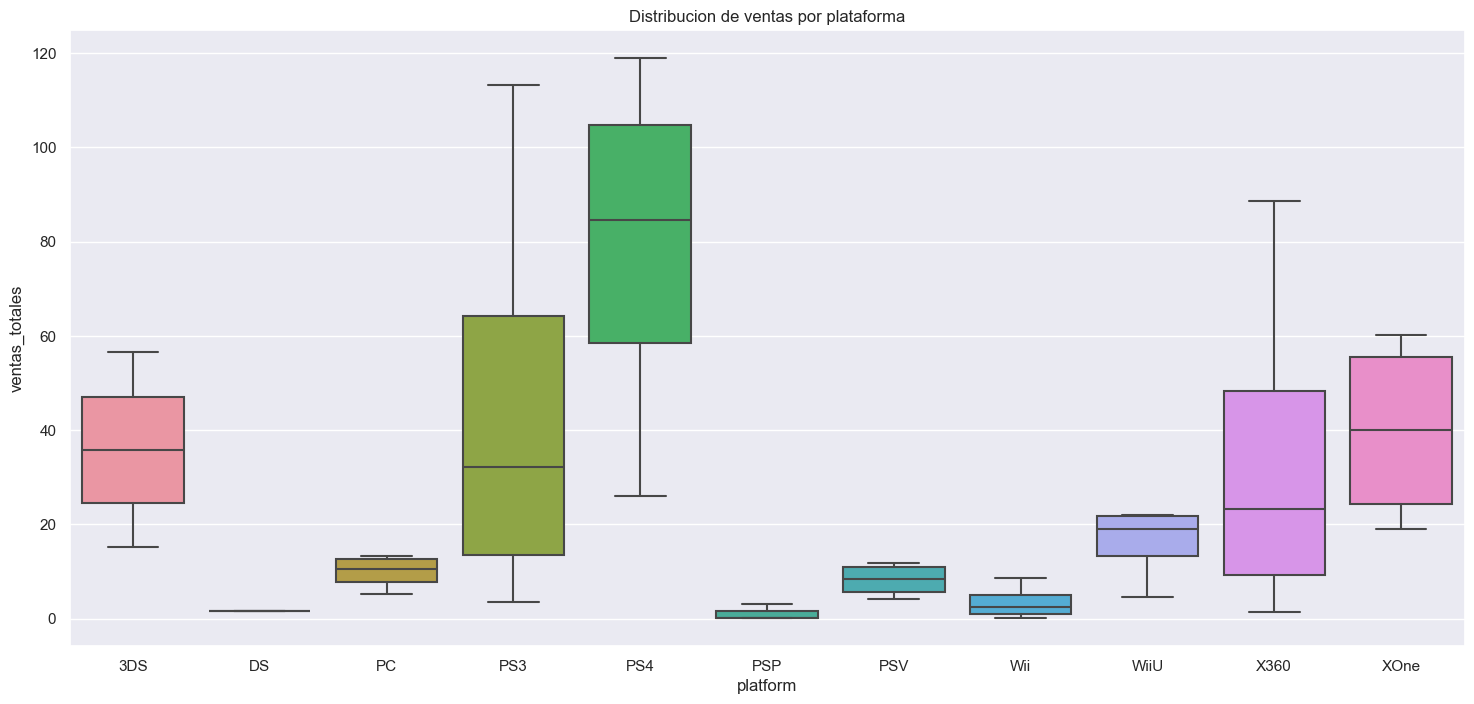

In [531]:
ax = sns.boxplot(x='platform', y='ventas_totales', data= box_plot_data)
ax.set_title('Distribucion de ventas por plataforma')


Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). 
Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

En conclusion las criticas tanto de los usuarios como de los profesinales al ps4 no estan correlacionados con las ventas, aun que en las resenias de los profesionales pudieron aumentar las ventas para el ps4 

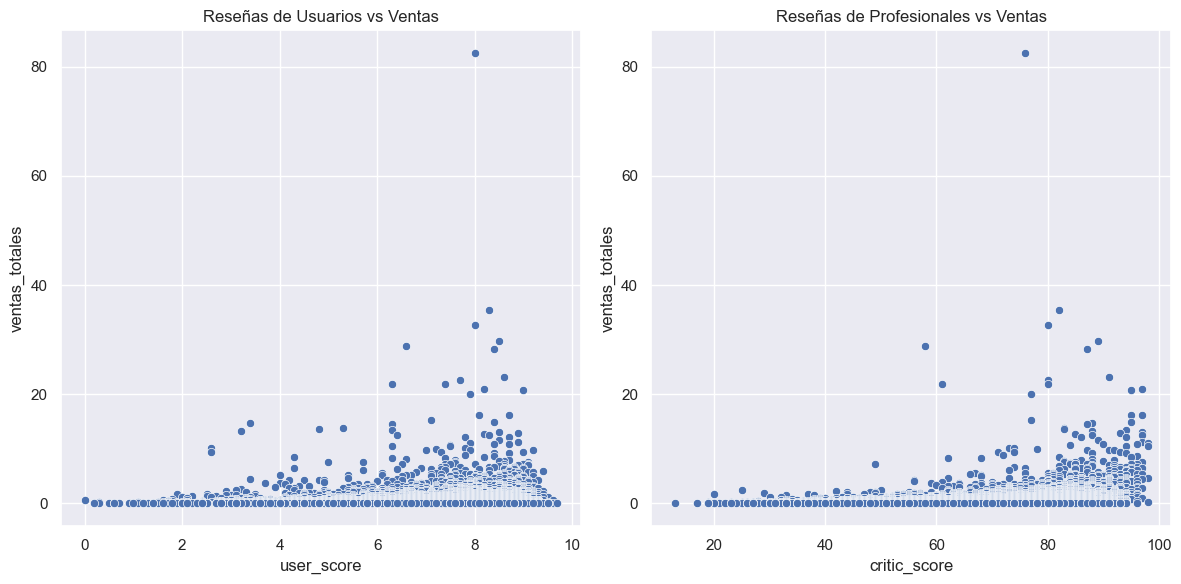

In [532]:
# Gráfico de dispersión para reseñas de usuarios vs ventas
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='user_score', y='ventas_totales', data=df)
plt.title('Reseñas de Usuarios vs Ventas')

# Gráfico de dispersión para reseñas de profesionales vs ventas
plt.subplot(1, 2, 2)
sns.scatterplot(x='critic_score', y='ventas_totales', data=df)
plt.title('Reseñas de Profesionales vs Ventas')

plt.tight_layout()
plt.show()

In [533]:
# Calcular la correlación
correlation_user_score = df['user_score'].corr(df['ventas_totales'])
correlation_critic_score = df['critic_score'].corr(df['ventas_totales'])

print(f"Correlación entre reseñas de usuarios y ventas: {correlation_user_score}")
print(f"Correlación entre reseñas de profesionales y ventas: {correlation_critic_score}")

Correlación entre reseñas de usuarios y ventas: 0.08817911987579134
Correlación entre reseñas de profesionales y ventas: 0.2455066871773635


In [534]:
ps4 = df.groupby(['platform', 'name'])[['ventas_totales', 'critic_score', 'user_score']].sum()
ps4.query("platform == 'PS4' & critic_score > 0 & user_score > 0", inplace=True)
ps4.reset_index()

ps4_corr_critic = ps4['ventas_totales'].corr(ps4['critic_score'])
ps4_corr_user = ps4['ventas_totales'].corr(ps4['user_score'])


print(f"Correlación entre reseñas de profesionales y ventas del PS4: {ps4_corr_critic}")
print(f"Correlación entre reseñas de usuarios y ventas del PS4: {ps4_corr_user}")




Correlación entre reseñas de profesionales y ventas del PS4: 0.40589480145836665
Correlación entre reseñas de usuarios y ventas del PS4: -0.03362497596528891


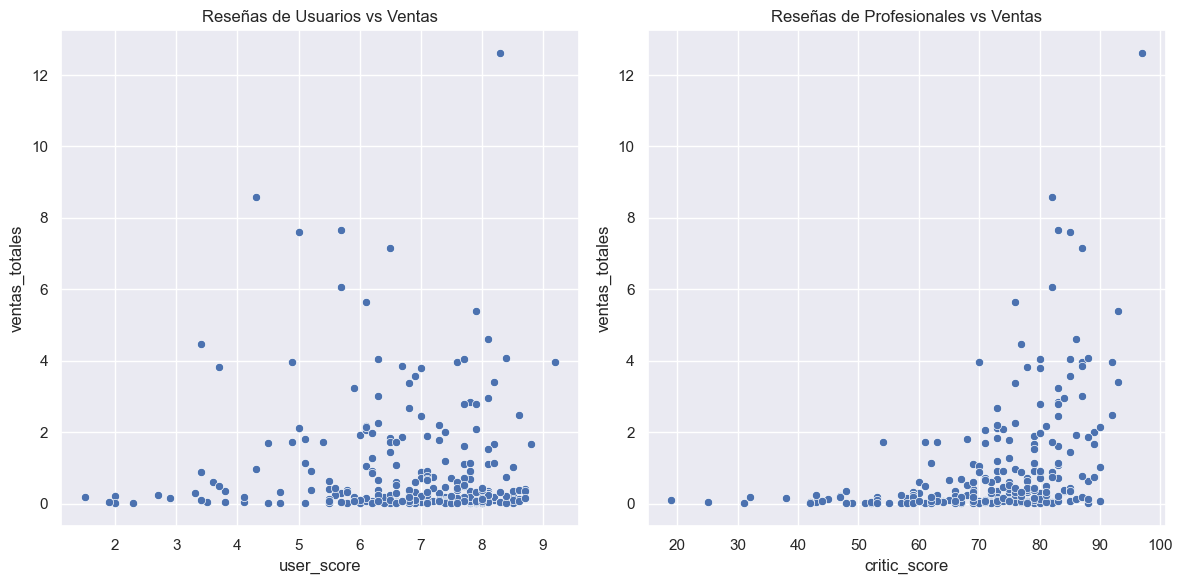

In [535]:
# Gráfico de dispersión para reseñas de usuarios vs ventas
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='user_score', y='ventas_totales', data=ps4)
plt.title('Reseñas de Usuarios vs Ventas')

# Gráfico de dispersión para reseñas de profesionales vs ventas
plt.subplot(1, 2, 2)
sns.scatterplot(x='critic_score', y='ventas_totales', data=ps4)
plt.title('Reseñas de Profesionales vs Ventas')

plt.tight_layout()
plt.show()

Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

In [536]:
def correlacion (plataforma):
    data = df[df['platform'] == plataforma]
    corr  =  data[['critic_score', 'user_score', 'ventas_totales']].corr()['ventas_totales']
    
    data.plot(y='ventas_totales', x='critic_score', kind='scatter', grid=True)
    plt.title(plataforma)

    data.plot(y='ventas_totales', x='user_score', kind='scatter', grid=True)
    plt.title(plataforma)

    print(plataforma,'\n', corr)
    print('*******************')

Procesando plataforma: PS3
PS3 
 critic_score      0.432432
user_score        0.126691
ventas_totales    1.000000
Name: ventas_totales, dtype: float64
*******************
Procesando plataforma: PS4
PS4 
 critic_score      0.406568
user_score       -0.031957
ventas_totales    1.000000
Name: ventas_totales, dtype: float64
*******************
Procesando plataforma: X360
X360 
 critic_score      0.393736
user_score        0.114459
ventas_totales    1.000000
Name: ventas_totales, dtype: float64
*******************
Procesando plataforma: XOne
XOne 
 critic_score      0.416998
user_score       -0.068925
ventas_totales    1.000000
Name: ventas_totales, dtype: float64
*******************
Procesando plataforma: Wii
Wii 
 critic_score      0.177560
user_score        0.112414
ventas_totales    1.000000
Name: ventas_totales, dtype: float64
*******************
Procesando plataforma: WiiU
WiiU 
 critic_score      0.348380
user_score        0.400219
ventas_totales    1.000000
Name: ventas_totales, dty

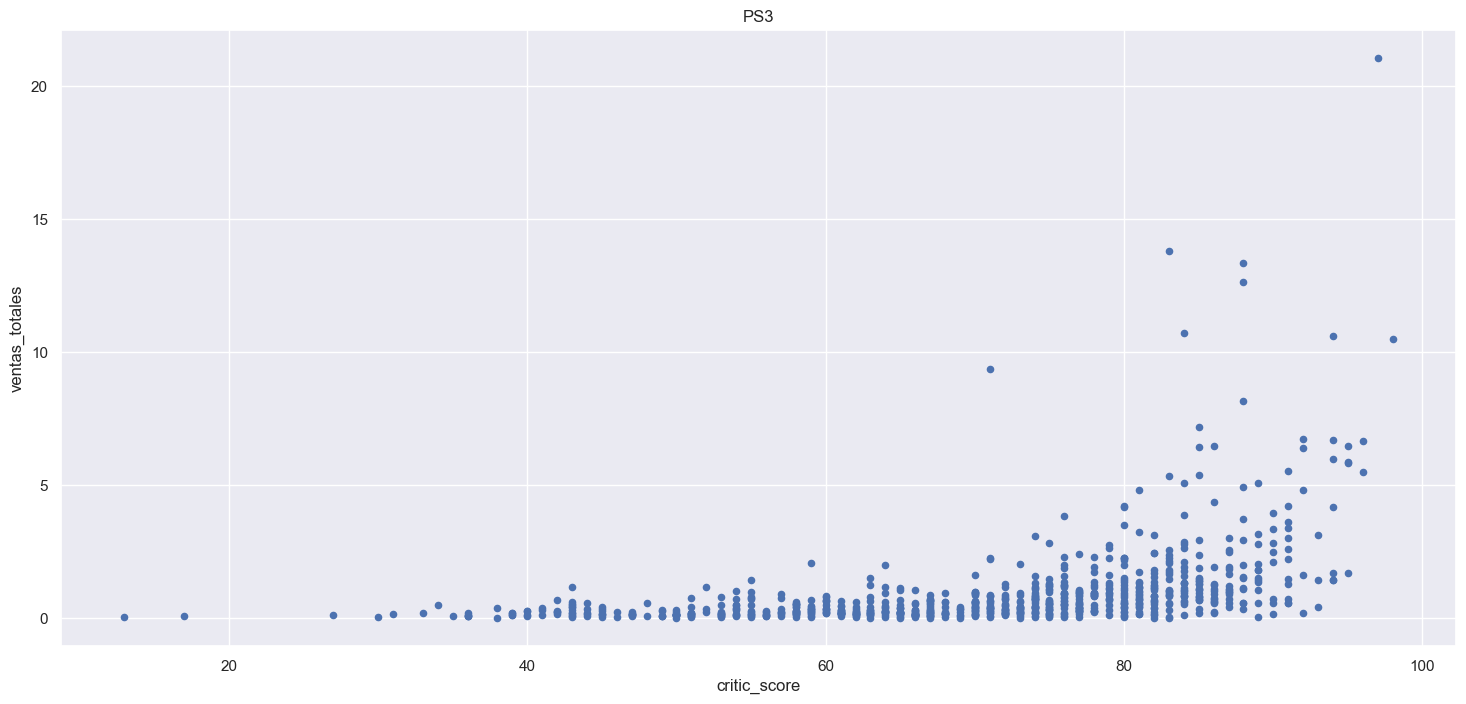

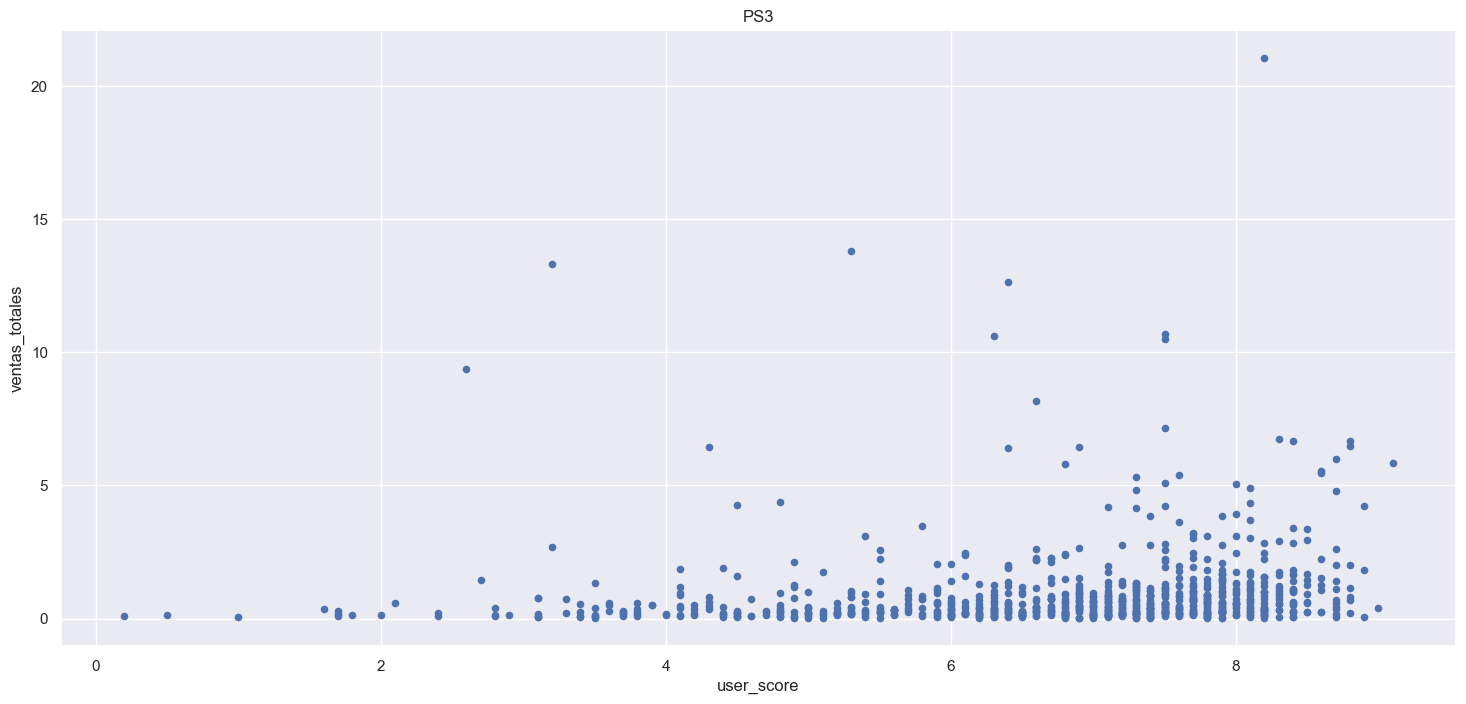

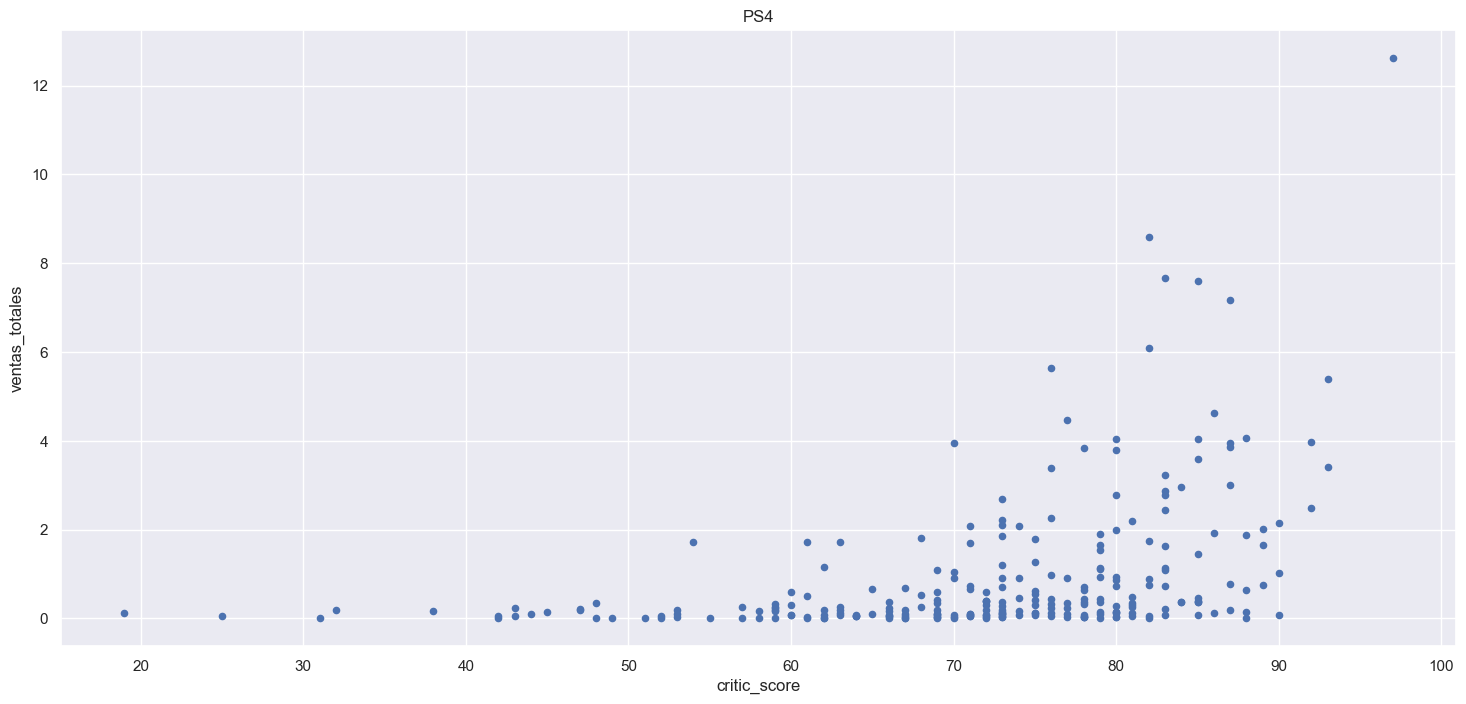

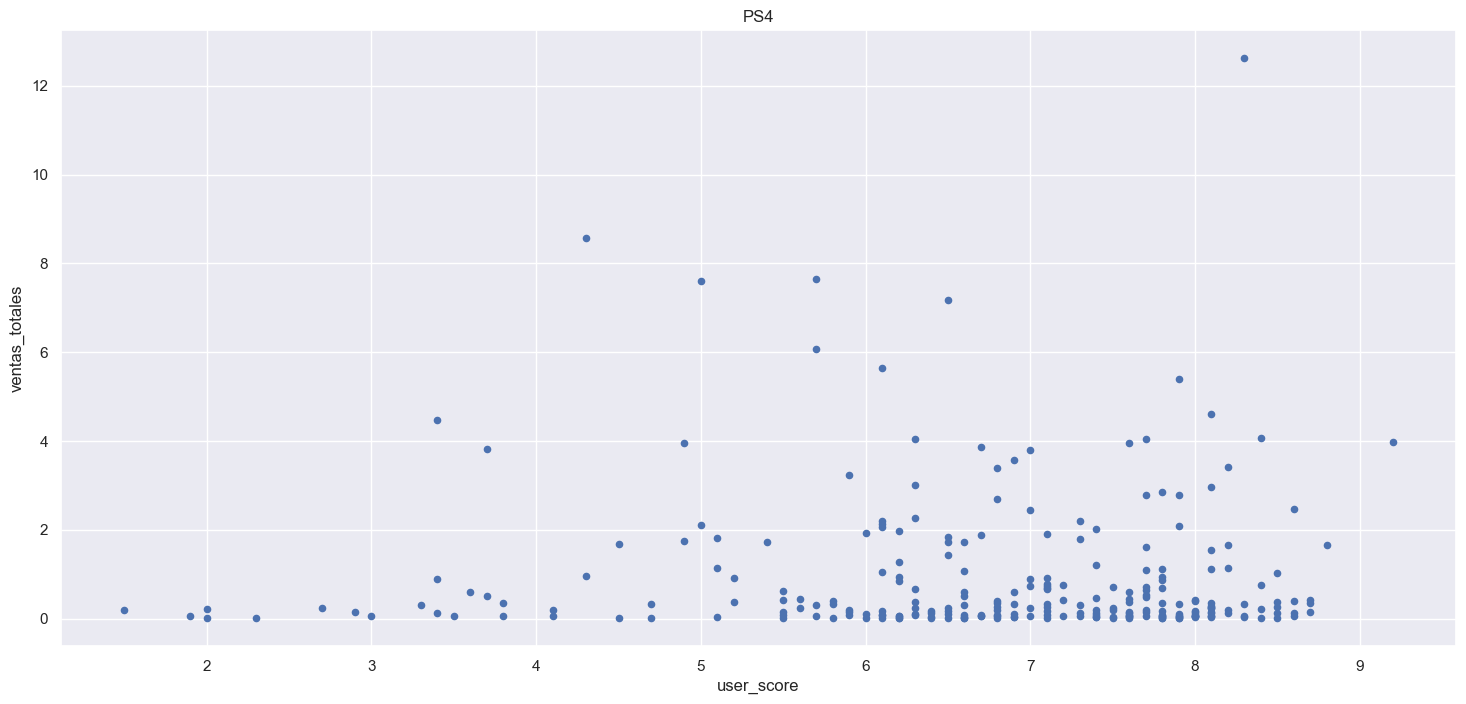

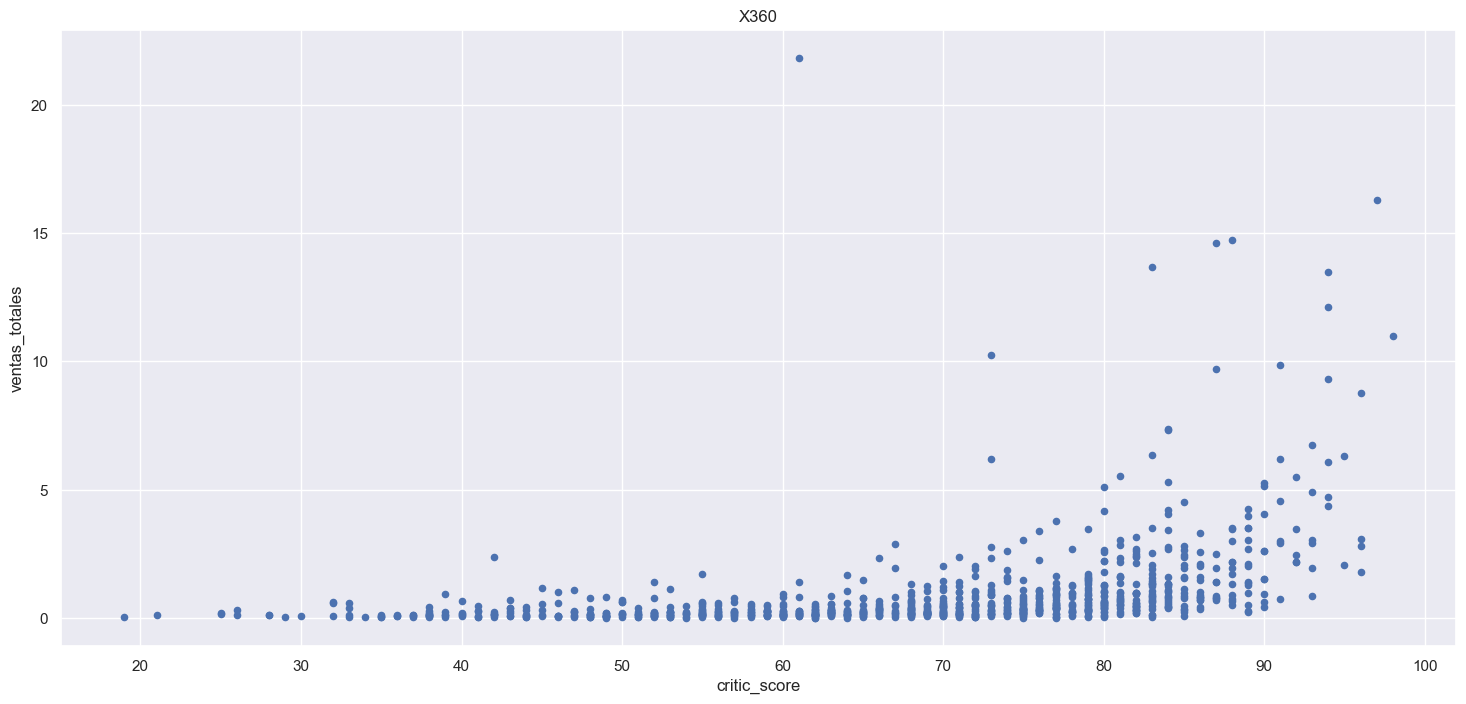

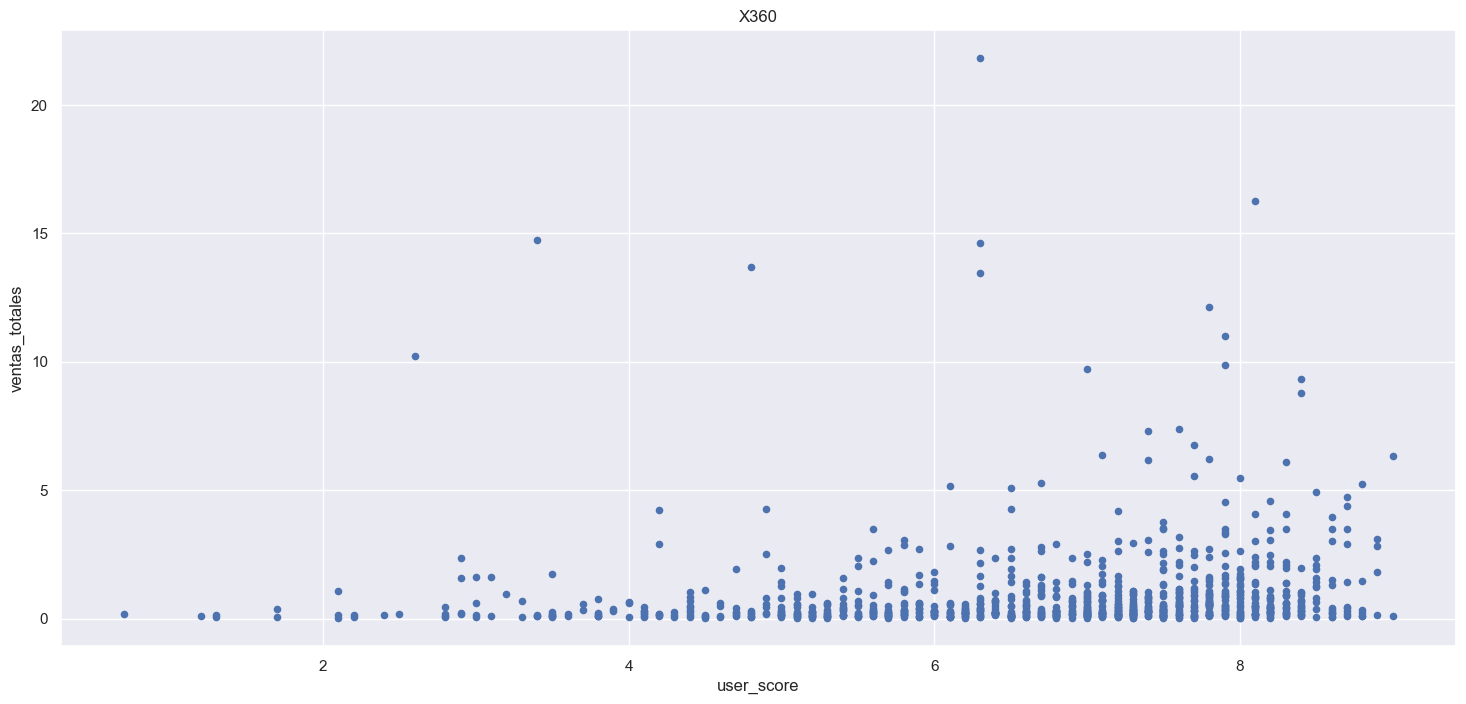

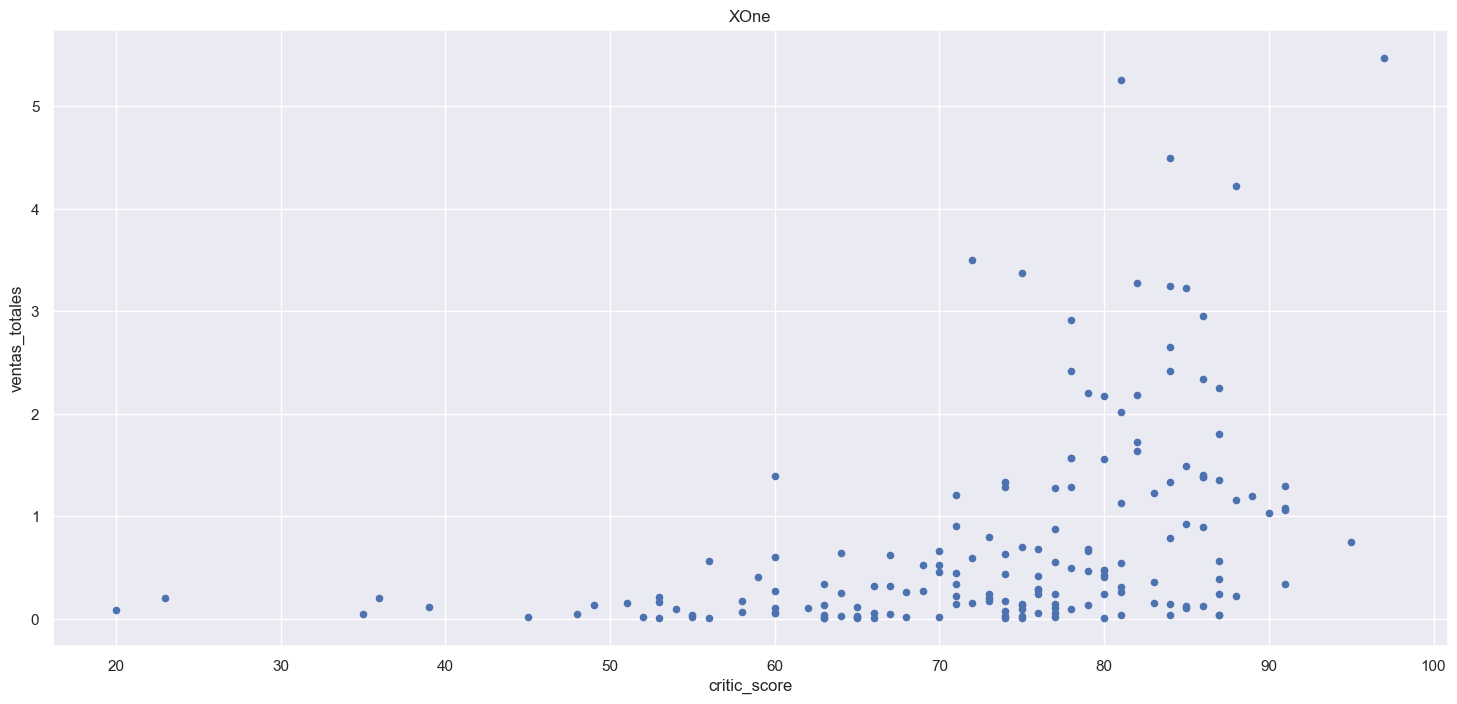

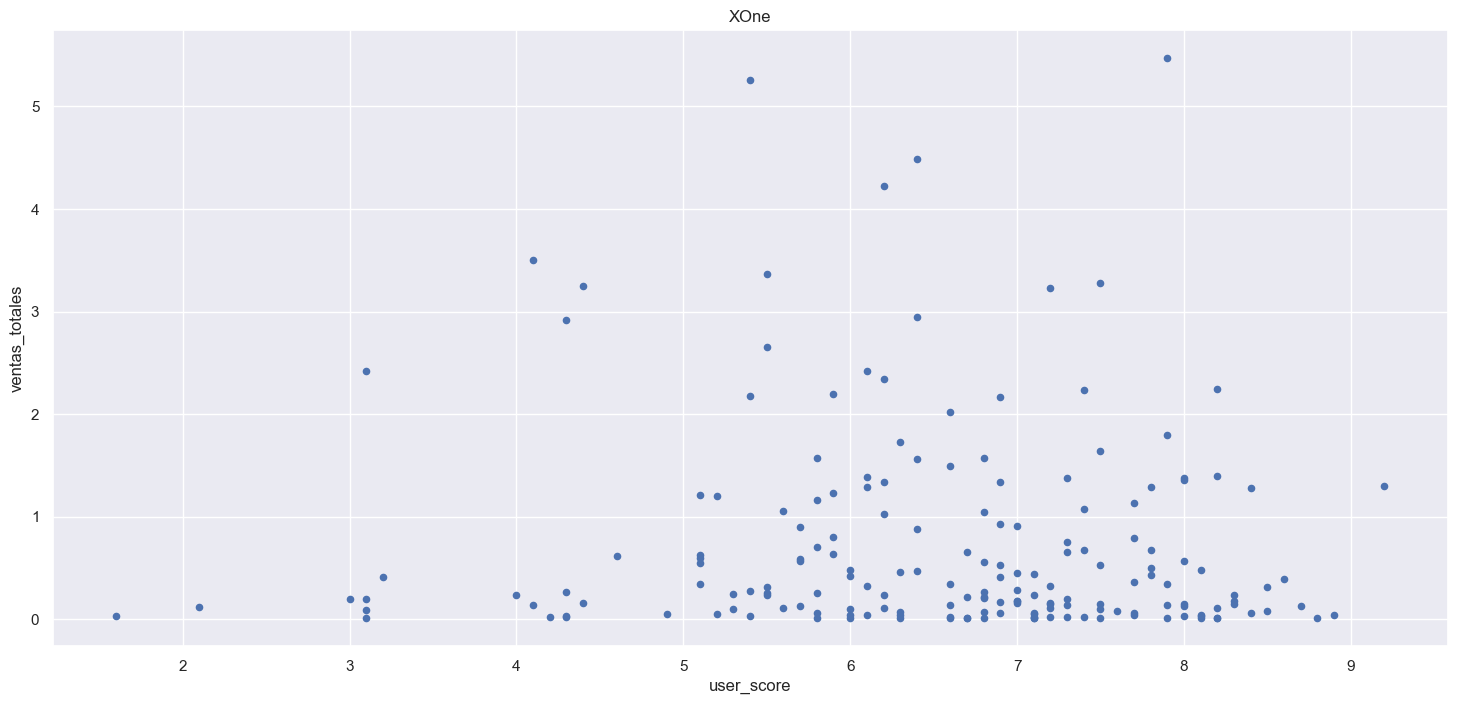

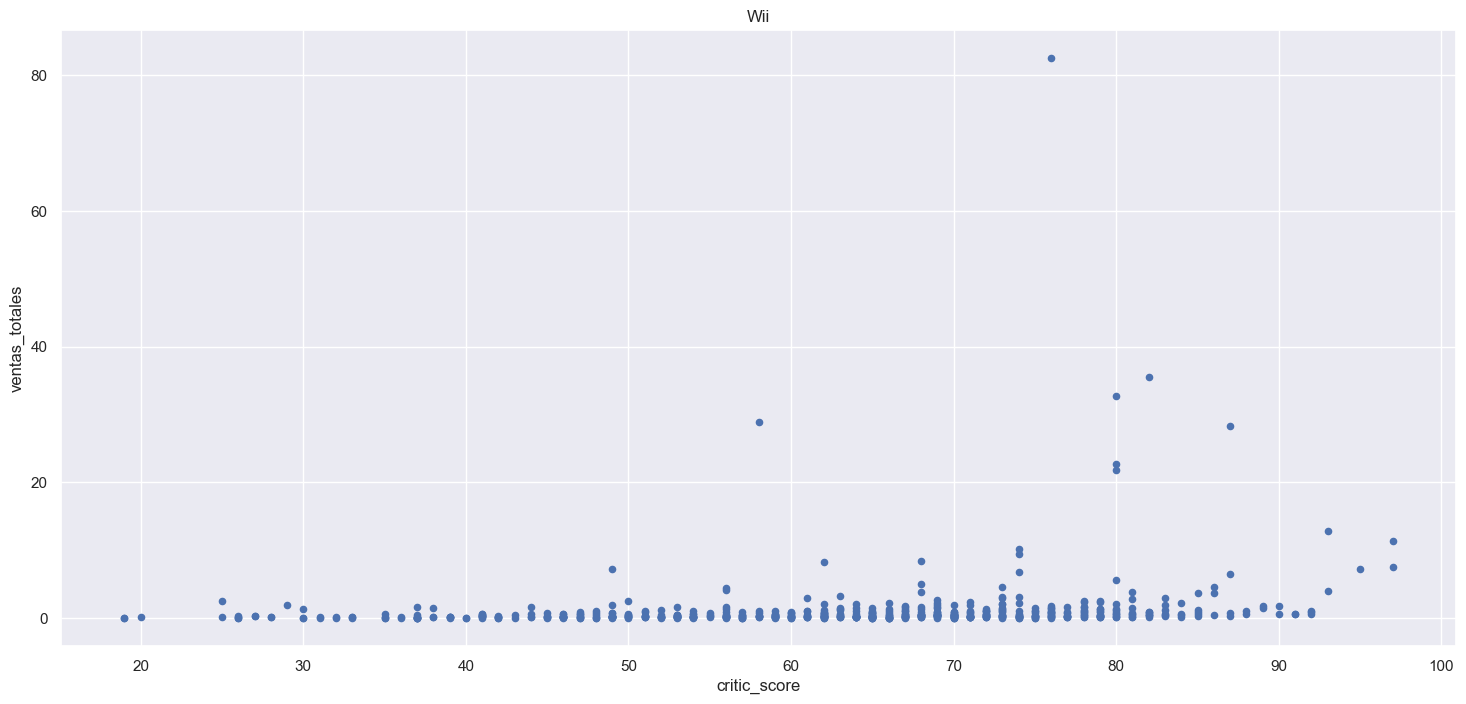

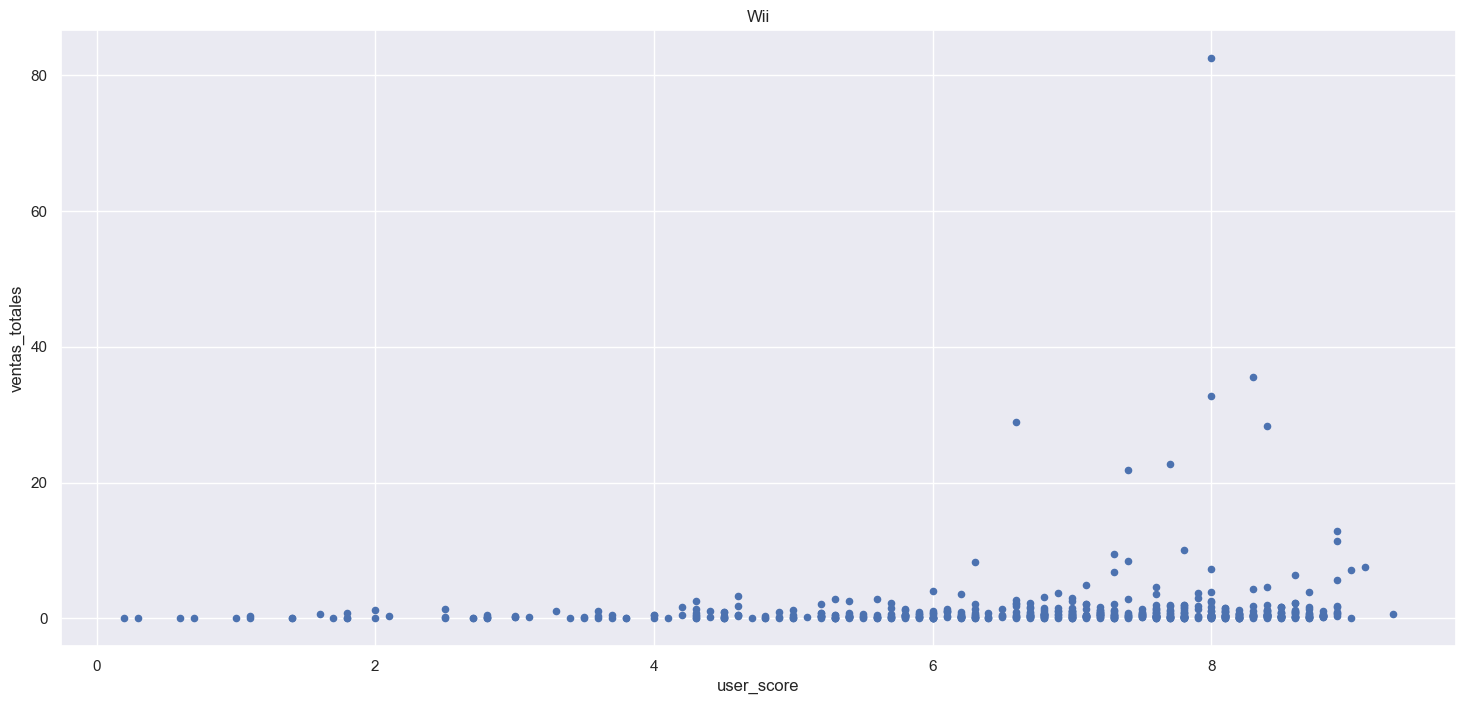

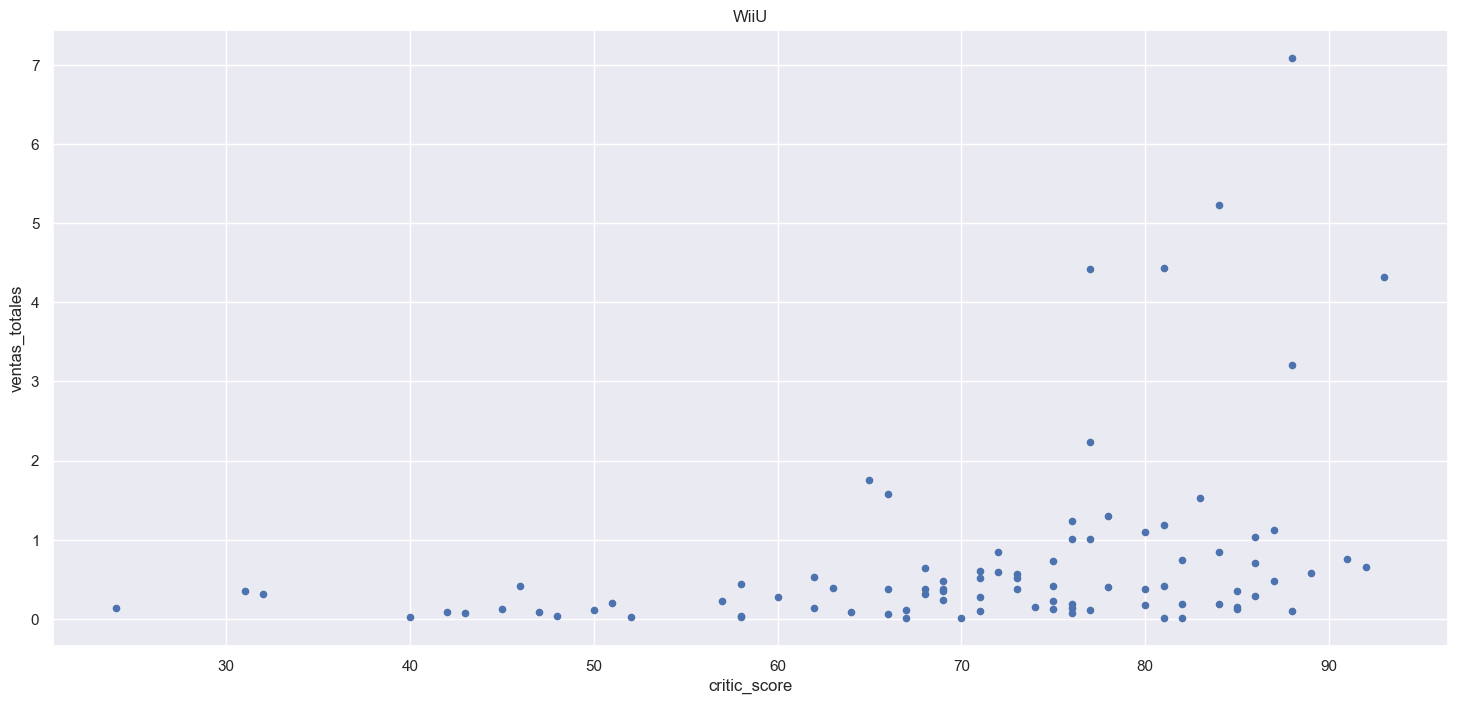

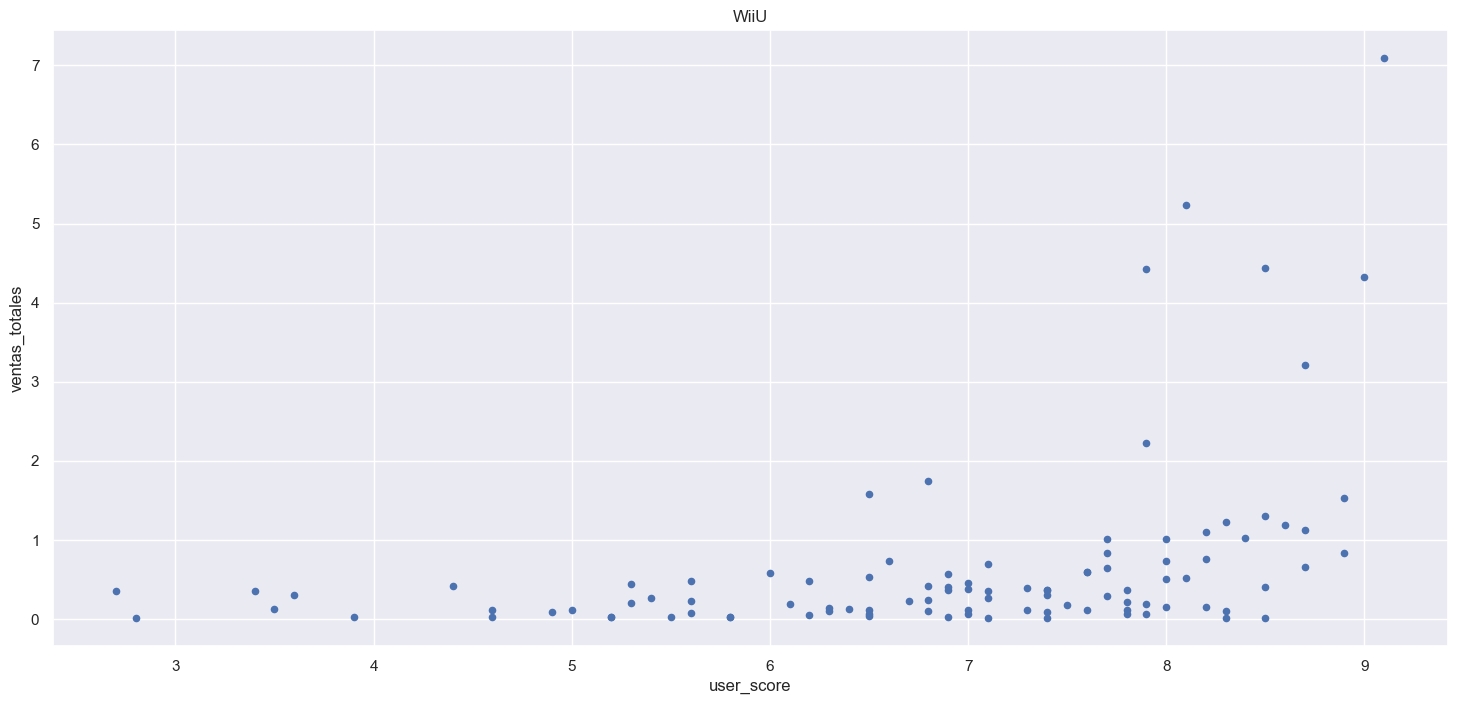

In [537]:
plataformas = ['PS3', 'PS4', 'X360', 'XOne', 'Wii', "WiiU"]

for plataforma in plataformas:
    print(f"Procesando plataforma: {plataforma}")
    correlacion(plataforma) 

Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [538]:
datos_by_genero = clean_data.groupby(['genre', 'name'])['ventas_totales'].sum().sort_values(ascending=False).reset_index()

In [539]:
datos_by_genero.query("1 < ventas_totales < 8 ", inplace=True)

<Axes: xlabel='genre', ylabel='ventas_totales'>

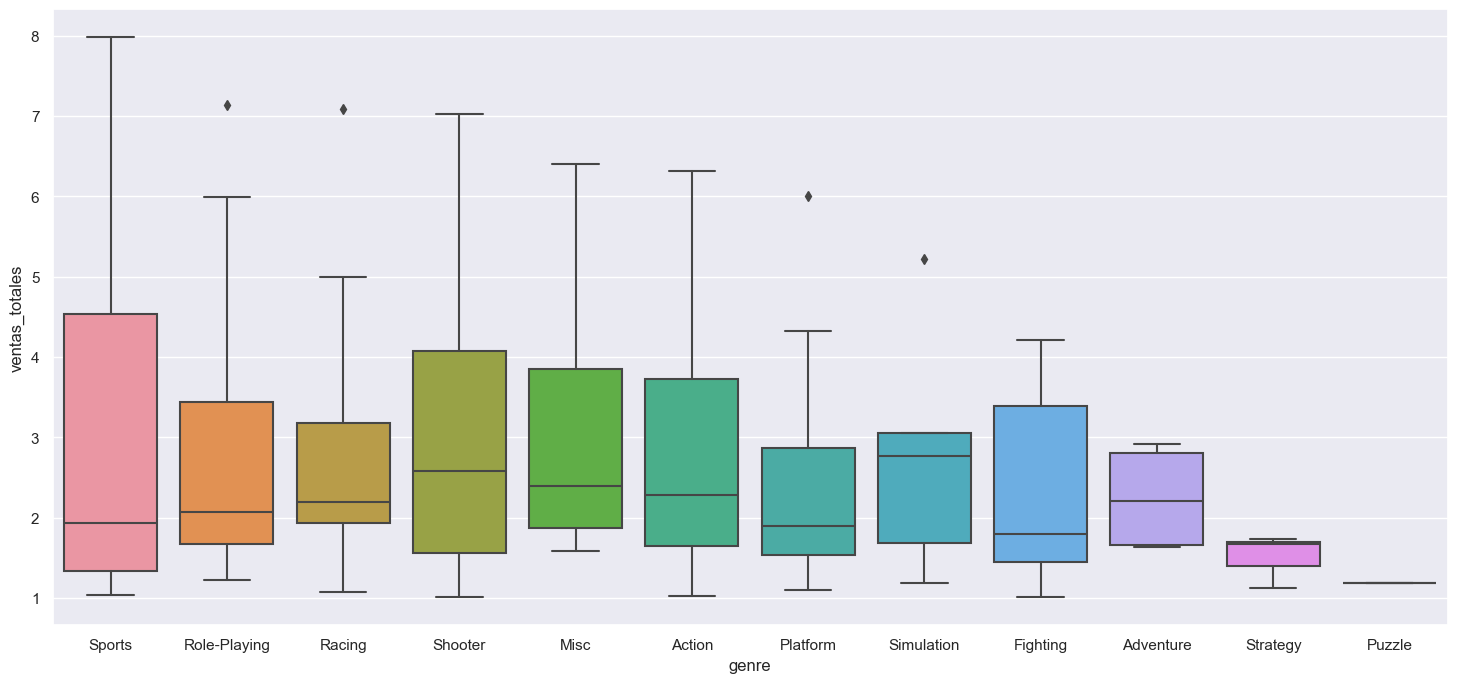

In [540]:
sns.boxplot(x='genre', y='ventas_totales', data=datos_by_genero)

Paso 4. Crea un perfil de usuario para cada región

Para cada región (NA, UE, JP) determina:

    Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

        Las 5 plataformas principales en NA con los datos del 2013 al 2016 son PS4, XOne, X360, y PS3.
        Las 5 plataformas principales en EU con los datos del 2013 al 2016 son PS3, PS4, XOne, y X360.
        Las 5 plataformas principales en JP con los datos del 2013 al 2016 son 3DS, PS3, PSV, y PS4.
        Esto quiere decir que tanto PS4, PS3, XOne y X360 son los lideresl del mercado en las plataformas en los ultimos 4 años

    
    Los cinco géneros principales. Explica la diferencia.
        Los generos en EU y NA son practicamente los mismos, esto quiere decir que se venden o elgusto por estos juegos en estas regiones son iguales, en JP los juegos de ROl son los mas vendidos, esto tambien por el estilo de vida de esta region.


        Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [541]:
# Convertir las clasificaciones de la ESRB a valores numéricos
rating_map = {'E': 1, 'T': 2, 'M': 3, 'E10+': 4, 'Rating Desconocido': 5}
clean_data['esrb_rating_num'] = clean_data['rating'].map(rating_map)

C:\Users\alfre\AppData\Local\Temp\ipykernel_5552\594189677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['esrb_rating_num'] = clean_data['rating'].map(rating_map)


In [542]:
# Region NA
plataformas_na = clean_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).reset_index()
#plataformas_na.reset_index(inplace=True)
plataformas_na['porcentaje_mercado_na'] = plataformas_na['na_sales']*100 / plataformas_na['na_sales'].sum()
plataformas_na

,platform,na_sales,porcentaje_mercado_na
0,PS4,108.74,24.842933
1,XOne,93.12,21.274360
2,X360,81.66,18.656188
3,PS3,63.50,14.507322
4,3DS,38.20,8.727239
5,WiiU,29.21,6.673368
6,PC,11.11,2.538210
7,Wii,6.56,1.498709
8,PSV,5.04,1.151447
9,DS,0.57,0.130223


In [543]:
# 5 Genereos principales en NA
generos_na = clean_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).reset_index().head()
generos_na


,genre,na_sales
0,Action,126.05
1,Shooter,109.74
2,Sports,65.27
3,Role-Playing,46.40
4,Misc,27.49


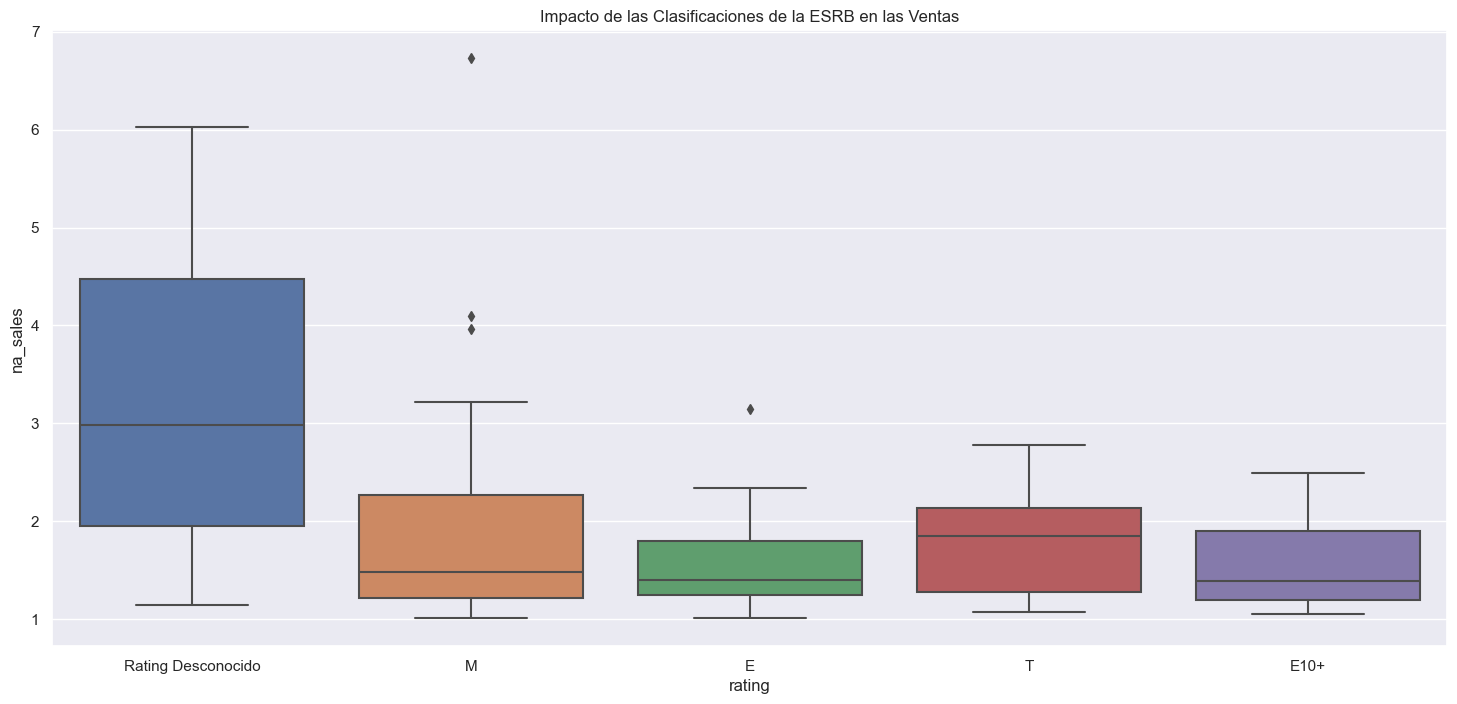

In [544]:
# Visualizar la relación entre las clasificaciones de la ESRB y las ventas
filtro_clasificacion_na = clean_data.query('1 < na_sales < 7 ')

sns.boxplot(x='rating', y='na_sales', data= filtro_clasificacion_na)
plt.title('Impacto de las Clasificaciones de la ESRB en las Ventas')
plt.show()

In [545]:
# Region EU
plataformas_eu = clean_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).reset_index()
plataformas_eu['porcentaje_mercado_eu'] = plataformas_eu['eu_sales']*100 / plataformas_eu['eu_sales'].sum()
plataformas_eu

,platform,eu_sales,porcentaje_mercado_eu
0,PS4,141.09,35.971241
1,PS3,67.81,17.288326
2,XOne,51.59,13.152997
3,X360,42.52,10.840578
4,3DS,30.96,7.893328
5,PC,25.36,6.465594
6,WiiU,19.85,5.060806
7,PSV,6.10,1.555210
8,Wii,5.93,1.511868
9,DS,0.85,0.216710


In [546]:
# 5 Genereos principales en EU
generos_eu = clean_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).reset_index().head()
generos_eu

,genre,eu_sales
0,Action,118.13
1,Shooter,87.86
2,Sports,60.52
3,Role-Playing,36.97
4,Racing,20.19


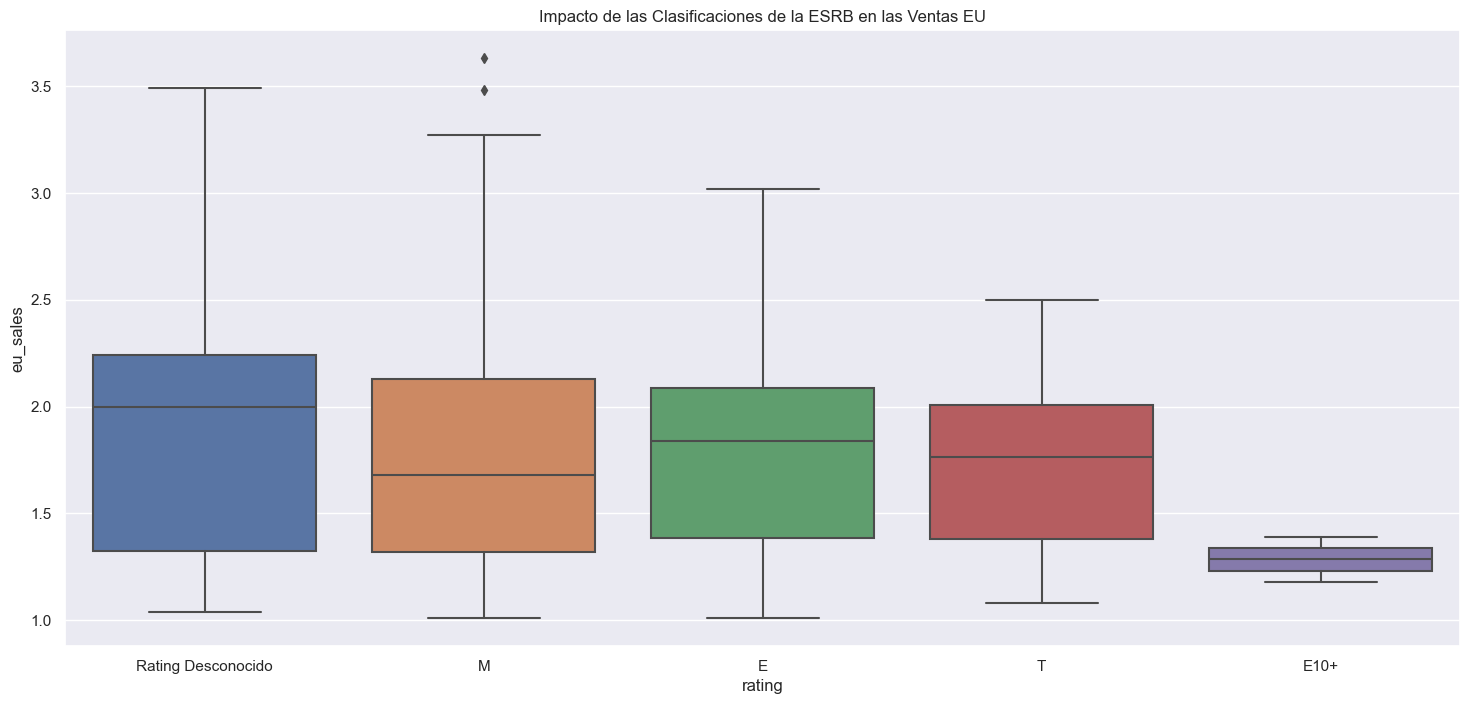

In [547]:
# Visualizar la relación entre las clasificaciones de la ESRB y las ventas
filtro_clasificacion_eu = clean_data.query('1 < eu_sales < 4 ')

sns.boxplot(x='rating', y='eu_sales', data= filtro_clasificacion_eu)
plt.title('Impacto de las Clasificaciones de la ESRB en las Ventas EU')
plt.show()

In [548]:
# Region JP
plataformas_jp = clean_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).reset_index()
plataformas_jp['porcentaje_mercado_jp'] = plataformas_jp['jp_sales']*100 / plataformas_jp['jp_sales'].sum()
plataformas_jp

,platform,jp_sales,porcentaje_mercado_jp
0,3DS,67.81,48.167353
1,PS3,23.35,16.586163
2,PSV,18.59,13.205001
3,PS4,15.96,11.336838
4,WiiU,10.88,7.728371
5,PSP,3.29,2.336980
6,X360,0.51,0.362267
7,XOne,0.34,0.241512
8,Wii,0.05,0.035516
9,DS,0.00,0.000000


In [549]:
# 5 Genereos principales en JP
generos_jp = clean_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).reset_index().head()
generos_jp

,genre,jp_sales
0,Role-Playing,51.04
1,Action,40.49
2,Misc,9.20
3,Fighting,7.65
4,Shooter,6.61


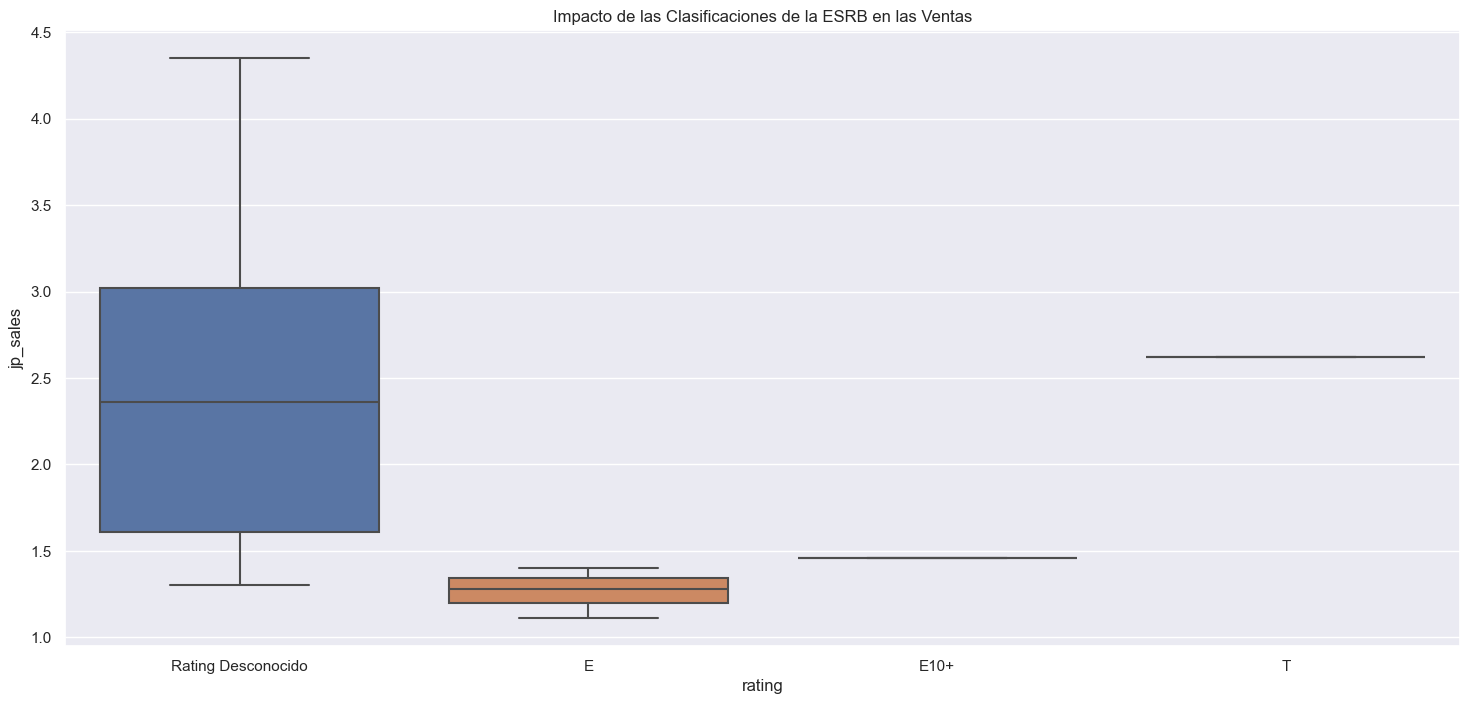

In [550]:

# Visualizar la relación entre las clasificaciones de la ESRB y las ventas
filtro_clasificacion_jp = clean_data.query('1 < jp_sales < 7 ')

sns.boxplot(x='rating', y='jp_sales', data= filtro_clasificacion_jp)
plt.title('Impacto de las Clasificaciones de la ESRB en las Ventas')
plt.show()


In [551]:
clean_data['rating'].unique()

array(['M', 'Rating Desconocido', 'E', 'T', 'E10+'], dtype=object)

In [552]:
# Convertir las clasificaciones de la ESRB a valores numéricos
rating_map = {'E': 1, 'T': 2, 'M': 3, 'E10+': 4, 'Rating Desconocido': 5}
clean_data['esrb_rating_num'] = clean_data['rating'].map(rating_map)


C:\Users\alfre\AppData\Local\Temp\ipykernel_5552\2408130746.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['esrb_rating_num'] = clean_data['rating'].map(rating_map)


Paso 5. Prueba las siguientes hipótesis:

— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

    Formulación de Hipótesis: 
    Hipótesis Nula: Las calificaciones promedio de los usuarios para Xbox One y PC son iguales. 
    Hipótesis Alternativa: Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.
    Con la prueba T de dos muestras aceptamos la hipotesis nula.



In [568]:
calificacion_xone = clean_data[clean_data['platform'] == 'XOne']
calificacion_xone.query('user_score > 1', inplace =True)
calificacion_xone['user_score'].unique()

calificacion_pc = clean_data[clean_data['platform'] == 'PC']
calificacion_pc.query('user_score > 1', inplace =True)
calificacion_pc['user_score'].unique()

C:\Users\alfre\AppData\Local\Temp\ipykernel_5552\4282603690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calificacion_xone.query('user_score > 1', inplace =True)
C:\Users\alfre\AppData\Local\Temp\ipykernel_5552\4282603690.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calificacion_pc.query('user_score > 1', inplace =True)


array([3.9, 7.9, 2.2, 6. , 5.4, 5.7, 5.9, 4.2, 9.3, 8.5, 8. , 7.7, 5.5,
       6.7, 6.5, 6.2, 3. , 6.8, 8.3, 8.2, 4.7, 5.8, 4.5, 4.6, 7.6, 6.9,
       2.1, 7.5, 3.3, 7.3, 7.1, 4.4, 3.2, 8.6, 4.3, 7.4, 3.5, 8.1, 4.8,
       6.4, 8.4, 5.3, 8.9, 3.8, 2.5, 7. , 2.9, 3.6, 5.1, 3.4, 4. , 6.1,
       6.3, 8.7, 7.8, 1.4, 3.7, 2.4])

In [571]:
#calificacion_xone = clean_data[clean_data['platform'] == 'XOne']['user_score']
print(calificacion_xone['user_score'].mean())

#calificacion_pc = clean_data[clean_data['platform'] == 'PC']['user_score']
print(calificacion_pc['user_score'].mean())
print('***********************************')
# Realiza la prueba t de dos muestras
t_stat, p_value = stats.ttest_ind(calificacion_xone['user_score'], calificacion_pc['user_score'])

print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")

# Interpreta el resultado
alpha = 0.05

if p_value < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: Las calificaciones promedio son iguales.")

6.521428571428572
6.2696774193548395
***********************************
Estadístico t: 1.4788255981357277
Valor p: 0.14012658403611647
No podemos rechazar la hipótesis nula: Las calificaciones promedio son iguales.


— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
    
    Formulación de las hipótesis:

        Hipótesis Nula : Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
        Hipótesis Alternativa : Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

        En este caso rechazamos la Hipotesis nula ya que los valores promedio son diferentes
        
Explica:

— Cómo formulaste las hipótesis nula y alternativa.

    Bueno la Hipotesis nula generalmente se formula en una igualdad en este caso me pedia la calificacion de accion y deportes entonces decidi que la hipotesis nula seria la escrita.


— Qué criterio utilizaste para probar las hipótesis y por qué.

    La prueba t de dos muestras es una herramienta estadística muy útil cuando queremos comparar las medias de dos grupos independientes para determinar si hay una diferencia significativa entre ella




In [582]:
calificacion_action = clean_data[clean_data['genre'] == 'Action']
calificacion_action.query('user_score > 1', inplace =True)
calificacion_action['user_score'].unique()

calificacion_sport = clean_data[clean_data['genre'] == 'Sports']
calificacion_sport.query('user_score > 1', inplace =True)
calificacion_sport['user_score'].unique()



C:\Users\alfre\AppData\Local\Temp\ipykernel_5552\867674451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calificacion_action.query('user_score > 1', inplace =True)
C:\Users\alfre\AppData\Local\Temp\ipykernel_5552\867674451.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calificacion_sport.query('user_score > 1', inplace =True)


array([4.3, 5. , 5.7, 4.5, 4.2, 6.7, 4.4, 5.9, 6.3, 3.2, 5.5, 4.9, 7. ,
       6.1, 6.2, 5.6, 5.4, 4.1, 3. , 2.9, 6.4, 2.7, 6.5, 3.5, 7.4, 5.8,
       5.1, 7.5, 7.7, 7.8, 5.2, 7.1, 3.1, 7.2, 4.6, 3.3, 4. , 6.9, 3.6,
       6. , 8.2, 2.4, 2.8, 7.6, 5.3, 6.8, 1.8, 1.7, 3.8, 8.7, 1.6, 6.6,
       8.3, 1.5, 3.4, 7.3, 2. , 2.1, 1.9, 4.8, 8. , 3.9, 3.7, 8.8, 1.4])

In [583]:
print(calificacion_action['user_score'].mean())
print(calificacion_sport['user_score'].mean())
print('***********************************')

# Realiza la prueba t de dos muestras
t_stat, p_value = stats.ttest_ind(calificacion_action['user_score'], calificacion_sport['user_score'])

print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")

# Interpreta el resultado
alpha = 0.05

if p_value < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: Las calificaciones promedio son iguales.")

6.837532133676092
5.298734177215191
***********************************
Estadístico t: 11.250178820254787
Valor p: 1.5095834676404916e-26
Rechazamos la hipótesis nula: Las calificaciones promedio son diferentes.


Paso 6. Escribe una conclusión general

En Conclusion analizando los datos de l 2013 al  2016, las plataformas que mas venden son Xbox one, Xbox 360, PS3 y PS4 y que el mercado para juegos y que una opcion para juegos mas jugaos seria sport, shooter o juego de roles.

